<a href="https://colab.research.google.com/github/sisifo3/P_T_4/blob/main/ResNet18Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#['sitting_people', 'standing_people']

#sitting_people = 0
#standing_people = 1 

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from scipy.spatial.distance import pdist, squareform 
from google.colab import files
from math import floor
from tqdm import tqdm
import os
import cv2

import random
from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image
from torch.autograd import Variable



from __future__ import print_function, division

from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import copy 

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'test': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

['sitting_people', 'standing_people']
pred tensor([[0.7349, 0.2704],
        [0.7000, 0.2772],
        [0.9799, 0.0342],
        [0.8736, 0.1374],
        [0.7674, 0.2130],
        [0.5504, 0.4855],
        [0.8738, 0.2100],
        [0.9755, 0.0213],
        [0.7287, 0.2186],
        [0.4019, 0.5027],
        [0.9085, 0.0777],
        [0.9763, 0.0256],
        [0.9360, 0.0406],
        [0.8416, 0.1931],
        [0.8857, 0.1245],
        [0.6734, 0.1684],
        [0.8033, 0.2077],
        [0.3715, 0.6711],
        [0.9544, 0.0530],
        [0.9179, 0.0728],
        [0.8842, 0.1023],
        [0.9610, 0.1233],
        [0.6215, 0.4485],
        [0.9212, 0.1127],
        [0.8929, 0.1750],
        [0.9850, 0.0085],
        [0.9714, 0.0409],
        [0.9297, 0.1378],
        [0.9604, 0.0250],
        [0.4116, 0.5070],
        [0.8601, 0.0968],
        [0.9608, 0.0981],
        [0.2887, 0.6584],
        [0.0823, 0.9002],
        [0.0039, 0.9951],
        [0.2220, 0.7703],
        [0.1280, 0.78

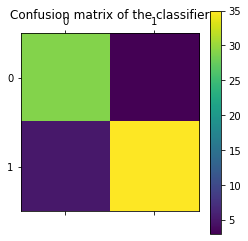

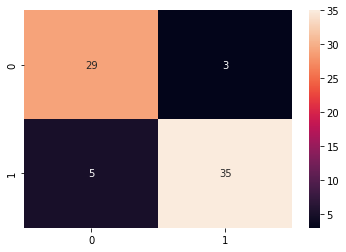

In [10]:
import os

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
#from sklearn.metrics.ranking import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import torch
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import pylab as pl

def test(test_loader, model, checkpoint, device):

        if checkpoint is not None:
            model.load_state_dict(torch.load(checkpoint,map_location ='cpu'))

        gt = torch.FloatTensor().to(device)
        pred = torch.FloatTensor().to(device)


        model.eval()
        with torch.no_grad():
            for i, (data, target) in enumerate(test_loader['test']):

                target = target.to(device)
                gt = torch.cat((gt, target), 0).to(device)
                #print("target",gt)
                out = model(data)
                #print("out",out)
                out = torch.sigmoid(out)
                #print("probabili",out)
                pred = torch.cat((pred, out), 0)
                #print("pred",pred)

        
        
        return pred, gt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#num_classes = 14
#class_names = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly' ,
#                 'Lung Opacity', 'Lung Lesion', 'Edema',  'Consolidation',
#                 'Pneumonia', 'Atelectasis' ,'Pneumothorax', 'Pleural Effusion',
#                 'Pleural Other', 'Fracture', 'Support Devices']
                 

#val_csv = 'CheXpert-v1.0-small/valid.csv'
# test_images, test_labels = getImagesLabels(val_csv, 'ones')
#test_images, test_labels = getImagesLabels(val_csv)



##############################################################################
#############################
#print('Testing on {} images\n'.format(len(test_images)))
#test_dataset = CheXpertDataset(test_images, test_labels, test=True)
#test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False,  num_workers=2, pin_memory=True)


data_dir = '/content/drive/MyDrive/video_work_environment/sitting_standing_dataset_v3/'
#/content/drive/MyDrive/video_work_environment/sitting_stading_dataset_v2/test_v2
#test_v2
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])for x in ['test']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                              shuffle=False, num_workers=2) for x in ['test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['test']}

class_names = image_datasets['test'].classes

print(class_names)
###############################################################################
###############################







###################################################################
############33###########
#model = DenseNet121(num_classes, test=True)
#model = torch.nn.DataParallel(model)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(device)
############################3
####################################################################
checkpoint = '/content/drive/MyDrive/video_work_environment/sitting_standing_dataset_v3/weight_resnet18/weights_Resnet18_VieodImg_7'

pred, gt = test(dataloaders, model,checkpoint, device) # U-ignore
#plot_ROC(pred, gt, num_classes, class_names)

#probabilities = torch.nn.functional.softmax(pred[0], dim=0)

print("pred",pred)
print("gt",gt)

pred[pred>=0.5] = 1
pred[pred<0.5] = 0


#print("pred",pred)
#print("gt",gt)
#print(pred)
#print(gt)

#pred_f = pred[:1]
pred_ten_f = []
for val in pred:pred_ten_f.append(val[1]) 


print('pred',pred_ten_f)

print('\nAccuracy:\n')
acc = accuracy_score(gt.cpu(), pred_ten_f)
print ('\t\t', acc)

print('\nf1 Score:\n')
f1 = f1_score(gt.cpu(), pred_ten_f)
print ('\t\t',f1)
    

print('\nPrecision:\n')
p1 = precision_score(gt.cpu(), pred_ten_f)
print ('\t\t',p1)

print('\n Recall :\n')
r1 = recall_score(gt.cpu(), pred_ten_f)
print ('\t\t',r1)


#tn, fp, fn, tp = confusion_matrix(gt.cpu(), pred_ten_f)
print(len(pred))
cm = confusion_matrix(gt.cpu(), pred_ten_f)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

#plot_confusion_matrix(X = gt.cpu(), y_true = pred_ten_f)  
#plt.show()


import seaborn as sns
#cm = confusion_matrix(y_true, y_pred)
f = sns.heatmap(cm, annot=True)
#pl.matshow(f)
#pl.title('Confusion matrix of the classifier')
#pl.colorbar()
#pl.show()

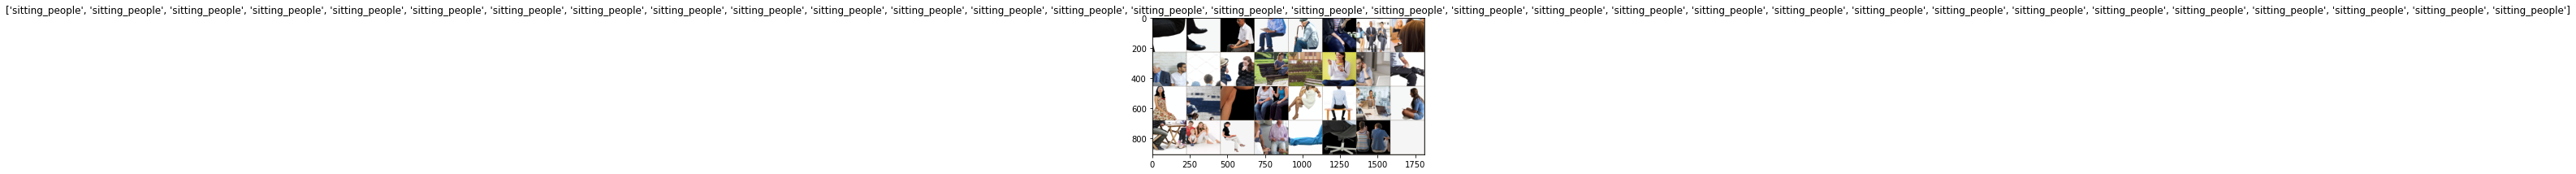

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['test']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])